# Home assignment - Non-Neural Machine Learning (ITLB358, MIB)
---
## Task description
You will process real-life data which includes the prices of a digital currency.
- The data represents historical daily time series for a digital currency (BTC) traded on the Saudi market (SAR/Sudi Riyal).
- Prices and volumes are quoted in both SAR & USD.
- Data date range: 11.05.2018 to 30.01.2021

### Your task is as follows:
- What are the steps if the dataset were "big data"?
	- Theoretical question!
	- Please create a code in a markdown cell, which represents a basic big data pipeline (with explicative steps).
	- If you want use pseudo code.
- Download the Digital currency dataset from google drive
	- `!wget "https://drive.google.com/uc?export=download&id=1ogo2n89jpuDPVoA4HXliB15oPF54Ewav" -O "dig_curr.csv"`
- Clean the data as necessary
- Modelling:
	- Regression
		- Linear Regression (baseline)
		- Random forest regressor
		- Split data into inputs and outputs
		- Split data into train and test set
		- Input features:
			- year, open_SAR, open_USD, high_SAR, high_USD, low_SAR, low_USD, close_SAR, volume
		- Output feature(s):
			- close_USD
			- Try to predict 2 different periods (1 day / 2 days ahead) on the test set!
- Reflection
	- Critically evaluate your work, including other approaches.
	- Answer in a markdown cell.


In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1ogo2n89jpuDPVoA4HXliB15oPF54Ewav" -O "dig_curr.csv"

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
random_seed = 69420
np.random.seed(random_seed)
df = pd.read_csv('dc.csv', parse_dates=["Unnamed: 0"])

In [13]:
df.rename(columns= {"Unnamed: 0" : "date"}, inplace=True)

In [15]:
df2 = df[['date', 'close_USD']]
df2.dtypes

date         datetime64[ns]
close_USD           float64
dtype: object

In [16]:
df2.index = df2['date']

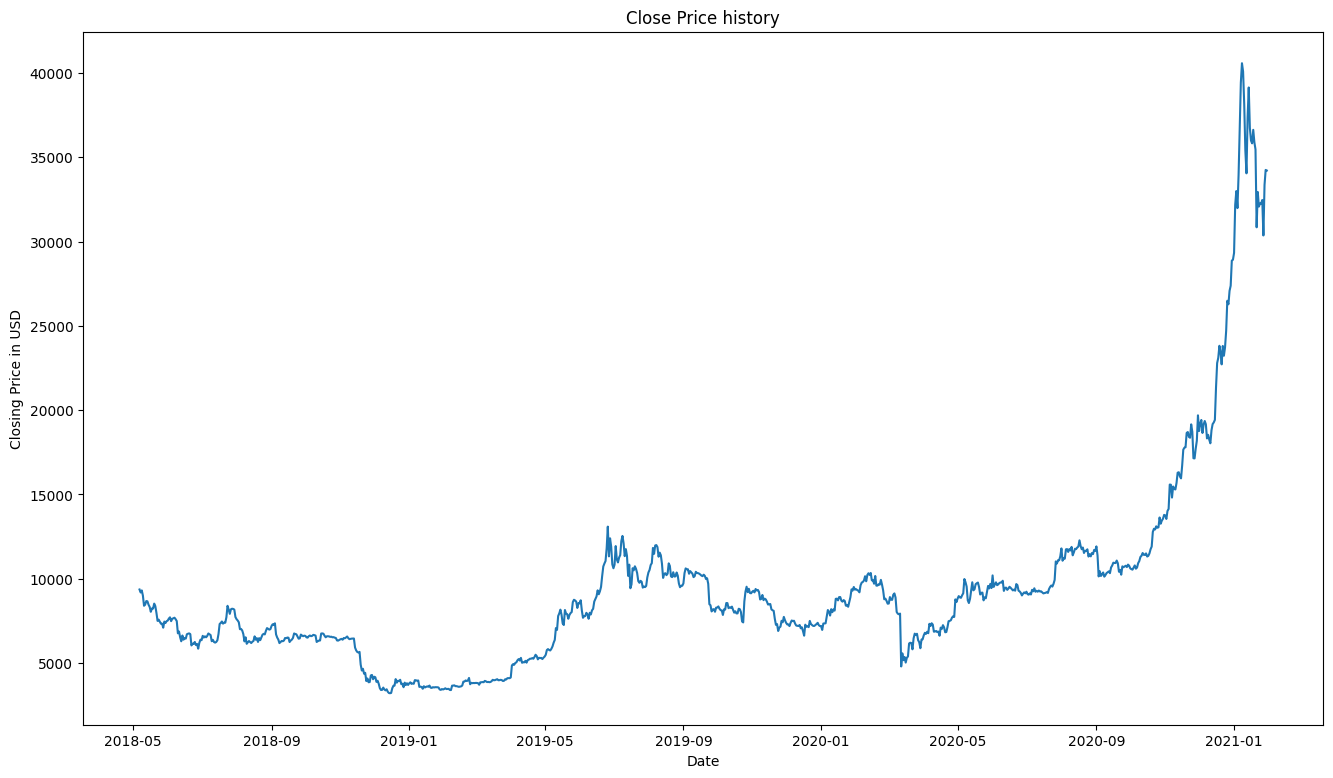

In [23]:
fig, ax = plt.subplots(figsize=(16,9))
plt.plot(df2["close_USD"])
ax.set_title('Close Price history')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price in USD')
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
# Creating two arrays for the feature and target
X = df['date']
y = df['close_USD']

In [26]:
# Splitting the datasets into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3, random_state=random_seed)


In [27]:
print("X_train:\t")
print(X_train)
print("----------")
print("X_test:")
print(X_test)
print("----------")
print("y_train:")
print(y_train)
print("----------")
print("y_test:")
print(y_test)
print()
print("Ratio of 1 in y in train: {0:.2f}%".format(sum(y_train)/len(y_train)*100))
print("Ratio of 1 in y in test: {0:.2f}%".format(sum(y_test)/len(y_test)*100))

X_train:	
56    2020-12-05
189   2020-07-25
936   2018-07-09
221   2020-06-23
963   2018-06-12
         ...    
74    2020-11-17
41    2020-12-20
589   2019-06-21
894   2018-08-20
331   2020-03-05
Name: date, Length: 300, dtype: datetime64[ns]
----------
X_test:
846   2018-10-07
680   2019-03-22
335   2020-03-01
250   2020-05-25
861   2018-09-22
         ...    
271   2020-05-04
623   2019-05-18
630   2019-05-11
927   2018-07-18
848   2018-10-05
Name: date, Length: 700, dtype: datetime64[ns]
----------
y_train:
56     19147.66
189     9700.42
936     6662.12
221     9624.89
963     6530.00
         ...   
74     17659.38
41     23455.52
589    10159.86
894     6254.84
331     9054.68
Name: close_USD, Length: 300, dtype: float64
----------
y_test:
846    6615.26
680    3986.93
335    8531.88
250    8900.35
861    6723.05
        ...   
271    8871.96
623    7257.45
630    7076.22
927    7381.90
848    6635.65
Name: close_USD, Length: 700, dtype: float64

Ratio of 1 in y in train: 918039